In [1]:
import os
import numpy as np
import scipy as sp
from functools import partial
from collections import namedtuple
from scipy import misc as spm
from scipy.io import loadmat
from skimage.transform import resize
from scipy.spatial.distance import euclidean
from scipy import interpolate as spi
import matplotlib.pyplot as plt
from PIL import Image
import PIL
from skimage import img_as_float

from skimage import transform as skitr

# turn of numpy warnings for now..
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Exercise: Image Transformations

## Problem Statement

Perform a comparative analysis of standard image interpolation techniques for different image processing tasks.

### Task 1 - Error Concealment using Image Interpolation

Given in the data/image_transformations_assignment.mat file are input images (ImInput) and erroneous pixel mask (ErrorMask) where imaging errors were observed. These are given as Matlab MAT file, that can be loaded using the scipy.io.loadmat function, which returns a dictionary that contains all the needed data. 

Perform image interpolation at the erroneous pixels using only the non-erroneous pixels surrounding them and generate image ImErrorConcealed. 

Compare the error-concealed image ImErrorConcealed with ground truth image (ImGroundTruth) to compare the performance of your inter- polation technique.

Interpolation Techniques to Explore: Linear Interpolation 

Functions to use: Write your own linear interpolation function.

In [2]:
assignment_data = loadmat(os.path.join("data", "image_transformations_assignment.mat"))
assignment_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'ImInput', 'ErrorMask', 'ImErrorConcealed', 'ImGroundTruth', 'ImOrig', 'Scales', 'ImRescaled', 'ImForward', 'ImInverse'])

In [3]:
ImInput = assignment_data["ImInput"]
ErrorMask = assignment_data["ErrorMask"]

(-0.5, 511.5, 511.5, -0.5)

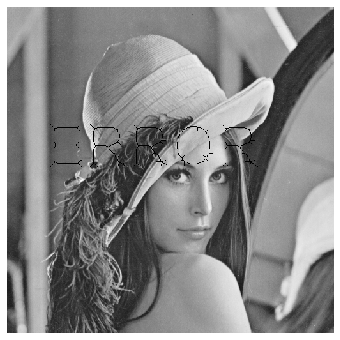

In [4]:
plt.figure(figsize=(6,6))
plt.imshow(ImInput, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')

(512, 512)

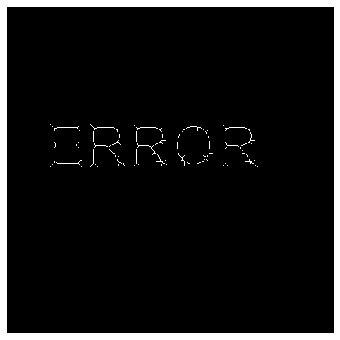

In [5]:
plt.figure(figsize=(6,6))
plt.imshow(ErrorMask, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
ErrorMask.shape

In [15]:
def get4ngb(rows, cols, x, y):
    # function ngb = get4ngb(rows, cols, x, y)
    # 
    # Input:
    # rows, cols    Number of rows and colums from the 2D Image
    # x,y           Coordinates of the center point
    #
    # Output:
    # ngb           list of possible neighbours

    # initialize empty result list
    ngb = list()

    # east
    if x > 1:
        ngb += [[x-1, y]];

    # north
    if y < cols-1:
        ngb += [[x, y+1]];

    # west
    if x < rows-1:
        ngb += [[x+1, y]];

    # south
    if y > 1:
        ngb += [[x, y-1]];

    return ngb 

In [20]:
ImErrorConcealed = np.zeros(ImInput.shape, dtype=ImInput.dtype)

h, w = ImInput.shape
for y in range(h):
    for x in range(w):
        if ErrorMask[y,x] == 0:
            ImErrorConcealed[y,x] = ImInput[y,x]
        else:
            neighbors = get4ngb(w,h,x,y)
            accu = 0
            counter = 0
            for p in neighbors:
                if ErrorMask[p[1], p[0]] == 1:
                    continue
                else:
                    accu += ImInput[p[1], p[0]]
                    counter += 1
                if counter > 0:
                    ImErrorConcealed[y,x] = accu / counter
        # implement error concealment using interpolation here
    

(-0.5, 511.5, 511.5, -0.5)

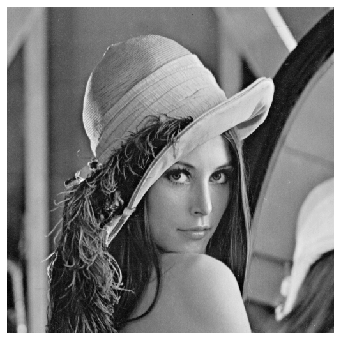

In [21]:
# display fixed image
plt.figure(figsize=(6,6))
plt.imshow(ImErrorConcealed, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

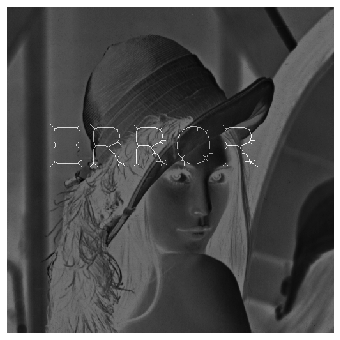

In [23]:
# display difference between fixed and ground truth
plt.figure(figsize=(6,6))
plt.imshow(ErrorMask - ImErrorConcealed, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')

### Task 2 - Interpolation for Image Resizing

Given in the AssignmentData.mat file are input images (ImOrig) and a set of geometric scale factors Scales. Isotropically scale ImOrig using these scale factors and inverse the scaling operation to bring back the image to the original scale. Lets call this ImRescaled. Perform this rescaling using different interpolation techniques. Compare the rescaled image ImRescaled to the original image ImOrig to understand reconstruction error that the interpolation technique results in.

Interpolation Kernels to Explore: Nearest Neighbor, Bilinear, Bicubic, Lanczoz.

Functions to use: Write your own nearest and bilinear interpolation functions. For the rest, you can use the function we defined here

In [ ]:
def resizeBicubic(image, scalingFactor):
    im = Image.fromarray(image)
    (width, height) = (image.shape[0] * scalingFactor, image.shape[1] * scalingFactor)
    im_resized = im.resize((int(width), int(height)), resample=PIL.Image.BICUBIC)
    return np.asarray(im_resized)

def resizeLanczos(image, scalingFactor):
    im = Image.fromarray(image)
    (width, height) = (image.shape[0] * scalingFactor, image.shape[1] * scalingFactor)
    im_resized = im.resize((int(width), int(height)), resample=PIL.Image.LANCZOS)
    return np.asarray(im_resized)

In [ ]:
# implement nearest neighbor interpolation

In [ ]:
# implement bilinear interpolation

In [ ]:
# implement functions to generate transform matrices

## Task 3 - Defining and applying simple geometric transformations

Compose the transformation matrix for the following transformations (Order: Scale, Rotate about Origin and Translate) using the composition procedure in Slide 33 of the lecture slides.

 1. Scale non-uniformly in by a factor of 0.5 for x-direction and 2.0 for y-direction. 
 2. Rotate clockwise by 45 degrees about the origin.
 3. Translate by 10 pixels in x-direction and −10 pixels in the y-direction

Apply this transformation to ImOrig given in the AssignmentData.mat file, using Forward Warping with nearest-neighbor splatting. Lets call this image ImForward. (Psuedo-code in Slide 32)

Apply this transformation to ImOrig using Inverse Warping with nearest-neighbor interpolation. Lets call this image ImInverse. (Psuedo-code in Slide 35)

Comparing with in-built functions: Apply this transformation on image ImOrig and display transformed image (say ImTransformed). Get the inverse of this transform and apply on ImTransformed to reverse the transformation.

Functions to use: meshgrid(if necessary) 

For comparison: look at functions provided from skimage.transform

In [ ]:
# define transformation chain

In [ ]:
# implement nearest neighbor splatting

In [ ]:
# implement inverse warping

In [ ]:
# compare results

In [ ]:
# try out skimage.transform methods